# HW1: Data visualization (Due by Apr 14 11:59pm)

This homework addresses data visualization and data manipulation.

Before you submit this Jupyter Notebook (.ipynb file) to Gradescope, **please restart your kernel and run all.** You do not need to submit a pdf file or .py file.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Part 1: Merge multiple DataFrame objects along columns ( 5 pts )

Given the following temperature datasets, merge them to a large dataframe using pandas

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv

In [2]:
#Save 2 data as df1 and df2
df1 = pd.read_csv( "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv")
df2 = pd.read_csv( "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv")
#merge them together using pd.merge
df = pd.concat([df1, df2])


## Part 2: Create dataframe (5 pts)

In this part, you should create a new dataframe based on the following two csv files and the dafaframe you create from part 1:


- FIPS code: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv

- station_metadata: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv


Create a new dataframe which includes the following columns: the ID number of the station, the year of the measurement, the temperature measurements (Jan - Dec in degrees C), country name, Lattitude, Longitude, station name (NAME column in station_metadata.csv).


**You will receive full credits if your dataframe contains all required columns. Column names and orders can be different.**

In [3]:
FIPS_code = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv")
station_metadata = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv")

#merge df and station_metadata
df = pd.merge(df, station_metadata, on='ID')

#Create a common column between df and FIPS_code
df["FIPS 10-4"] = df["ID"].str[0:2]

#Merge df and FIPS_code together
df = pd.merge(df, FIPS_code, on='FIPS 10-4')

#Drop unneccessary columns and stack the columns to facilitate later operations
df = df.drop(["FIPS 10-4", "ISO 3166","STNELEV"],axis = 1)
df = df.set_index(keys = ["ID","Year","Name","NAME","LATITUDE","LONGITUDE"])
df = df.stack()
df = df.reset_index()

#Change culumn names for better understanding
df = df.rename( columns={"level_6":"Month", 0:"Temperature (C)", "NAME" : "Station_name","Name":"Country"})
df["Month"] = df["Month"].str[5:].astype(int)

#Adjust the scale of the temperature 
df["Temperature (C)"] = df["Temperature (C)"]/100


## Part 3: Write a query function (10 pts)

Write a function called `query_climate()` which accepts five arguments:

`df`, the file name for the dataframe

`country`, a string giving the name of a country for which data should be returned.

`year_begin` and `year_end`, two integers giving the earliest and latest years for which should be returned.

`month`, an integer giving the month of the year for which should be returned.

The return value of `query_climate()` is a Pandas dataframe of temperature readings for the specified country, in the specified date range, in the specified month of the year. This dataframe should have the following columns, **in this order**:

`NAME`: The station name.

`LATITUDE`: The latitude of the station.

`LONGITUDE`: The longitude of the station.

`Country`: The name of the country in which the station is located.

`Year`: The year in which the reading was taken.

`Month`: The month in which the reading was taken.

`Temp`: The temperature at the specified station during the specified year and month. 


**Grading is based on unseen test examples. A test example is given below.**

In [4]:
def query_climate(df, country, year_begin, year_end, month):
    """
    df is the combined dataframe
    country, year_begin,year_after and month are as defined in the problem
    """
    #Filter the dataframe df to satisfy the user's input requirement
    processed_dataframe = df[
        (df['Country'] == country) & 
        (df['Year'] >= year_begin) & 
        (df['Year'] <= year_end) & 
        (df['Month'] == month)
    ]
    # extract the processed_dataframe to include the required columns in it as the result dataframe
    result_dataframe = processed_dataframe[['Station_name', 'LATITUDE', 'LONGITUDE', 'Country', 'Year','Month','Temperature (C)']]
    return result_dataframe

Run this example and check if you get the correct result, your obtained dataframe looks like:

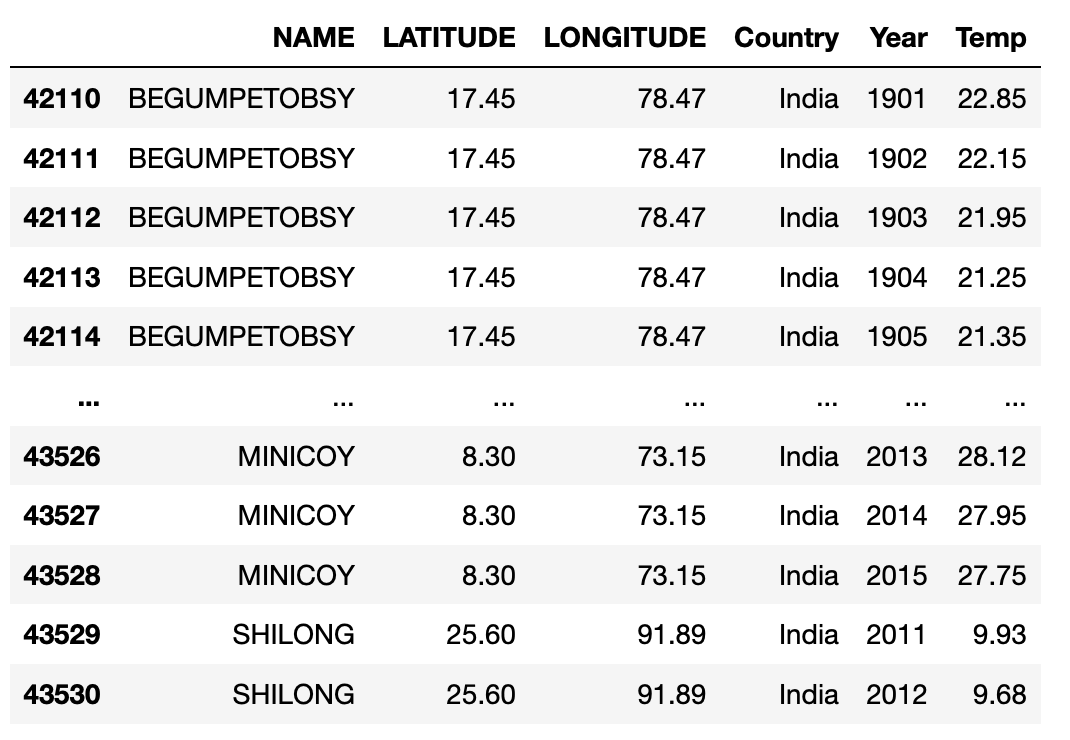

In [5]:
query_climate(df = df, country = "India", year_begin = 1901, year_end = 2020, month = 1)

,Station_name,LATITUDE,LONGITUDE,Country,Year,Month,Temperature (C)
442659,BEGUMPETOBSY,17.45,78.47,India,1901,1,22.85
442671,BEGUMPETOBSY,17.45,78.47,India,1902,1,22.15
442683,BEGUMPETOBSY,17.45,78.47,India,1903,1,21.95
442695,BEGUMPETOBSY,17.45,78.47,India,1904,1,21.25
442707,BEGUMPETOBSY,17.45,78.47,India,1905,1,21.35
...,...,...,...,...,...,...,...
458426,MINICOY,8.30,73.15,India,2013,1,28.12
458438,MINICOY,8.30,73.15,India,2014,1,27.95
458450,MINICOY,8.30,73.15,India,2015,1,27.75
458454,SHILONG,25.60,91.89,India,2011,1,9.93


## Part 4: Global warming ( 10 pts )

In this part, the goal is to create a bar plot which is used to compare average temperatures of decadeds 1901-1910 and 2011-2020.

The bar plot looks like the following:

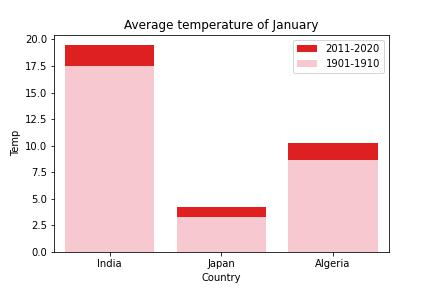

In above plot, I select three different countries and compute the average temperatures of year range 1901-1910 and 2011-2020 in January. Then, I use (two) barplot(s) to visualize the average temperature. 

**You should do more than my sample plot:**

Select 4 different countries and 6 different months, then compute two average temperatures for each country in each certain month. Then visualize 6 different plots (included in a single plot using `subplot` command). Please add necessary labels, titles, and legends to make your plot clear.

You should write a function or class to simplify your code if necessary.

What is your conclusion?

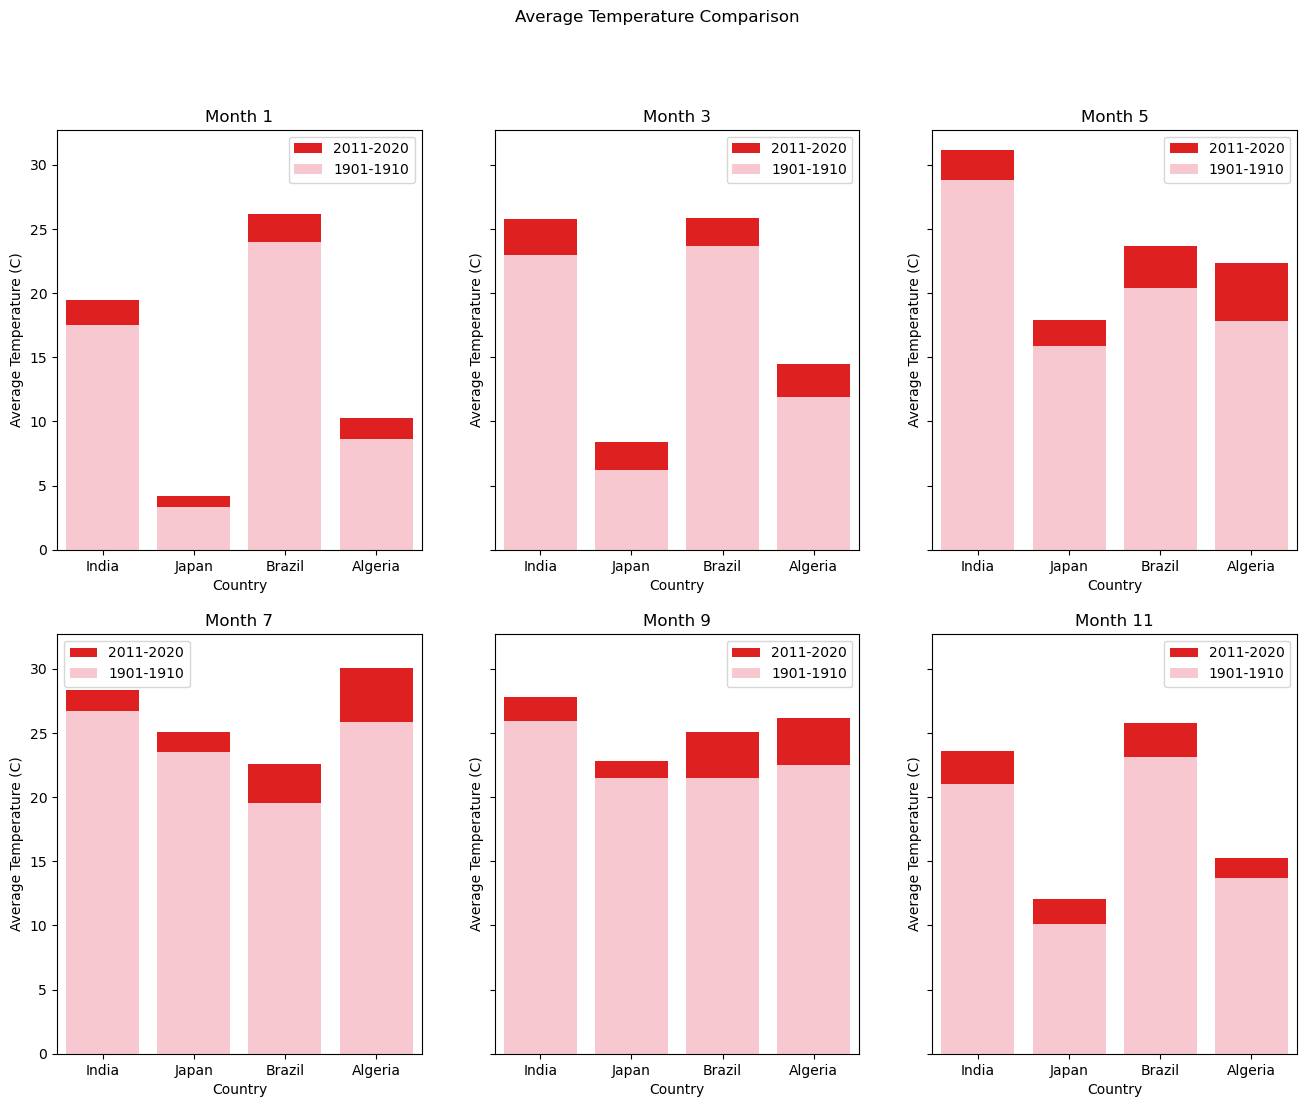

In [10]:
df_19 = df[(df['Year'] >= 1901) & (df['Year'] <= 1910)]        
df_20 = df[(df['Year'] >= 2011) & (df['Year'] <= 2020)]
def climate_plot(df, countries, months):
    #2*3 subplot
    fig, axes = plt.subplots(2, 3, sharey=True, figsize=(16, 12))
    fig.suptitle('Average Temperature Comparison')
    
    # Split the data into 2 parts, one for 1901-1910 and one for 2011-2020
    for i, month in enumerate(months):
        temperatures_19 = []
        temperatures_20 = []
        
        for country in countries:
            Average_temperature_19 = query_climate(df_19, country, 1901, 1910, month)["Temperature (C)"].mean()
            temperatures_19.append(Average_temperature_19)
            
            Average_temperature_20 = query_climate(df_20, country, 2010, 2020, month)["Temperature (C)"].mean()
            temperatures_20.append(Average_temperature_20)
        #Create data set to contain the temperature, flatten is used to better iterate
        ax = axes.flatten()[i]
        
        data_20 = {'Country': countries, 'Average Temperature (C)': temperatures_20}
        plot_20 = pd.DataFrame(data_20)
        
        # Plot the average temperatures
        sns.barplot(x="Country", y="Average Temperature (C)", data=plot_20, ax=ax, color = 'red',label='2011-2020')
        
        
        data_19 = {'Country': countries, 'Average Temperature (C)': temperatures_19}
        plot_19 = pd.DataFrame(data_19)
        
        # Plot the average temperatures
        sns.barplot(x="Country", y="Average Temperature (C)", data=plot_19, ax=ax, color = 'pink', label='1901-1910')
        
       
        ax.legend()  # Add legend to each subplot
        
        ax.set_title(f'Month {month}')
    
    plt.show()
    
countries = ['India', 'Japan', 'Brazil', 'Algeria']
months = [1, 3, 5, 7, 9, 11]

# Plot the average temperatures
climate_plot(df, countries, months)

## Part 5: Plots (15 pts)

In this part, please create at least **three** complex and interesting interactive data visualizations using the dataframe created above. These plots must be of different types (e.g. scatter plot, line plot, histogram, bar plot, and etc) and are different from what you have created in Part 4. You are also welcome to create any plots which are not discussed in the lectures.

Alongside the plots, you should clearly describe (use markdown) what you do for each plot and state your conclusions.

Requirement: You should use seaborn.

**Grading is based on the plots and your description. Your explanation should match your plot.**

## Comapre the temperature at the same station (ALGER_DAR_EL_BEIDA) at two time priod  using barplot (cross 110 years)


The temprature at the same station at the place is clearly higher overall between 2011-2020 compared with 1901 to 1910 (9 years's average temperature are higher and only 1 year's average temperature is lower), we can see a  warming trend

[Text(0, 0, '18.3725'),
 Text(0, 0, '18.0142'),
 Text(0, 0, '17.5775'),
 Text(0, 0, '18.5442'),
 Text(0, 0, '18.3375'),
 Text(0, 0, '18.6667'),
 Text(0, 0, '18.5375'),
 Text(0, 0, '18.3083'),
 Text(0, 0, '17.9'),
 Text(0, 0, '18.9642')]

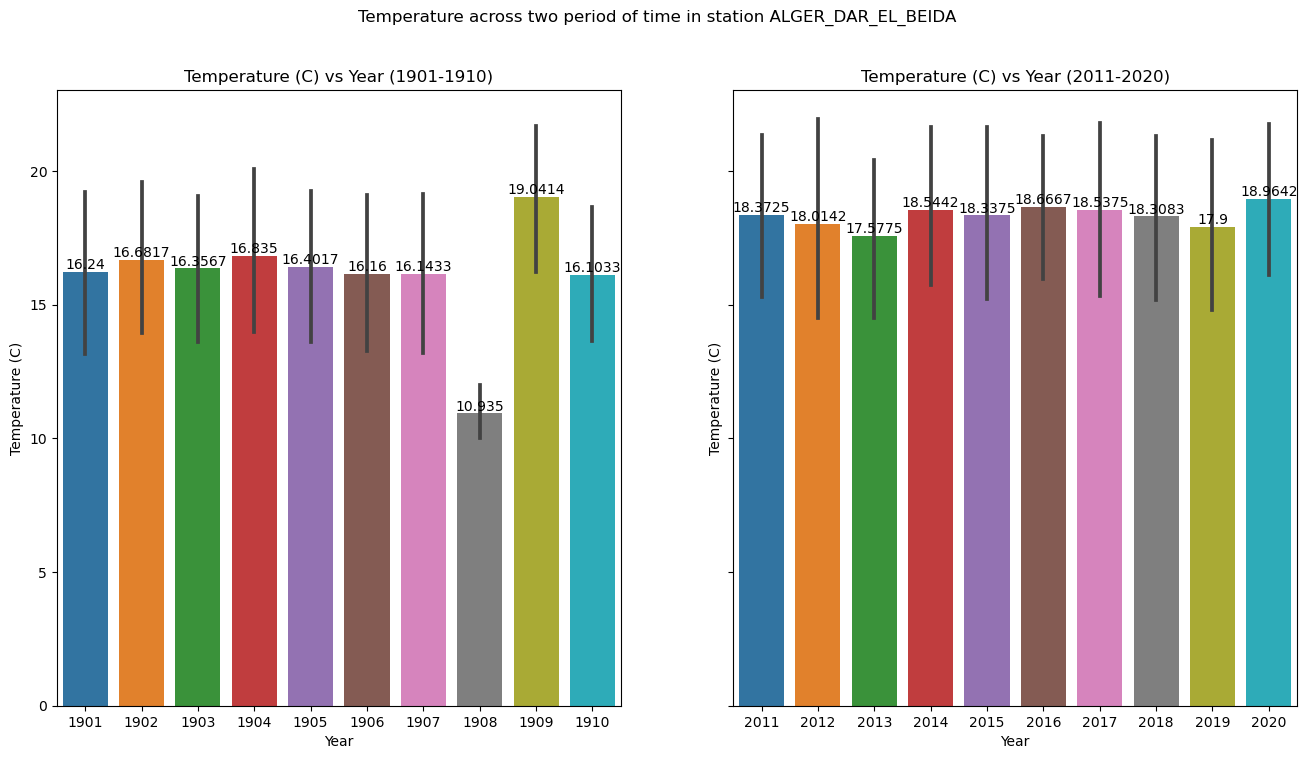

In [11]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(16,8))
fig.suptitle('Temperature across two period of time in station ALGER_DAR_EL_BEIDA')

# Choose station ALGER_DAR_EL_BEIDA from df and split them into two parts corresponding to two time periods
df_19_ALGER_DAR_EL_BEIDA = df_19[
        (df['Station_name'] == 'ALGER_DAR_EL_BEIDA')]

df_20_ALGER_DAR_EL_BEIDA = df_20[
        (df['Station_name'] == 'ALGER_DAR_EL_BEIDA')]
# Filter for the years 2011 to 2020
fig1 = sns.barplot(df_19_ALGER_DAR_EL_BEIDA, x="Year", y="Temperature (C)", ax=ax[0])
ax[0].set_title('Temperature (C) vs Year (1901-1910)')
# add number to each bar
fig1.bar_label(fig1.containers[0])

fig2 = sns.barplot(df_20_ALGER_DAR_EL_BEIDA, x="Year", y="Temperature (C)", ax=ax[1])
ax[1].set_title('Temperature (C) vs Year (2011-2020)')

fig2.bar_label(fig2.containers[0])

## Comapre the temperature at the same station (KABWE_MILLIKEN) at two time priod using histgram (cross 110 years)

The temprature at the same station at the place is clearly higher overall between 2011-2020 compared with 1901 to 1910 (6 years' highest above 25C and only 1's lowest below 10C for 2011-2020 and none's highest above 25C and all's lowest below 10C for 1901-1911), we can see a warming trend

Text(0.5, 1.0, 'Temperature (C) vs Year (2011-2020)')

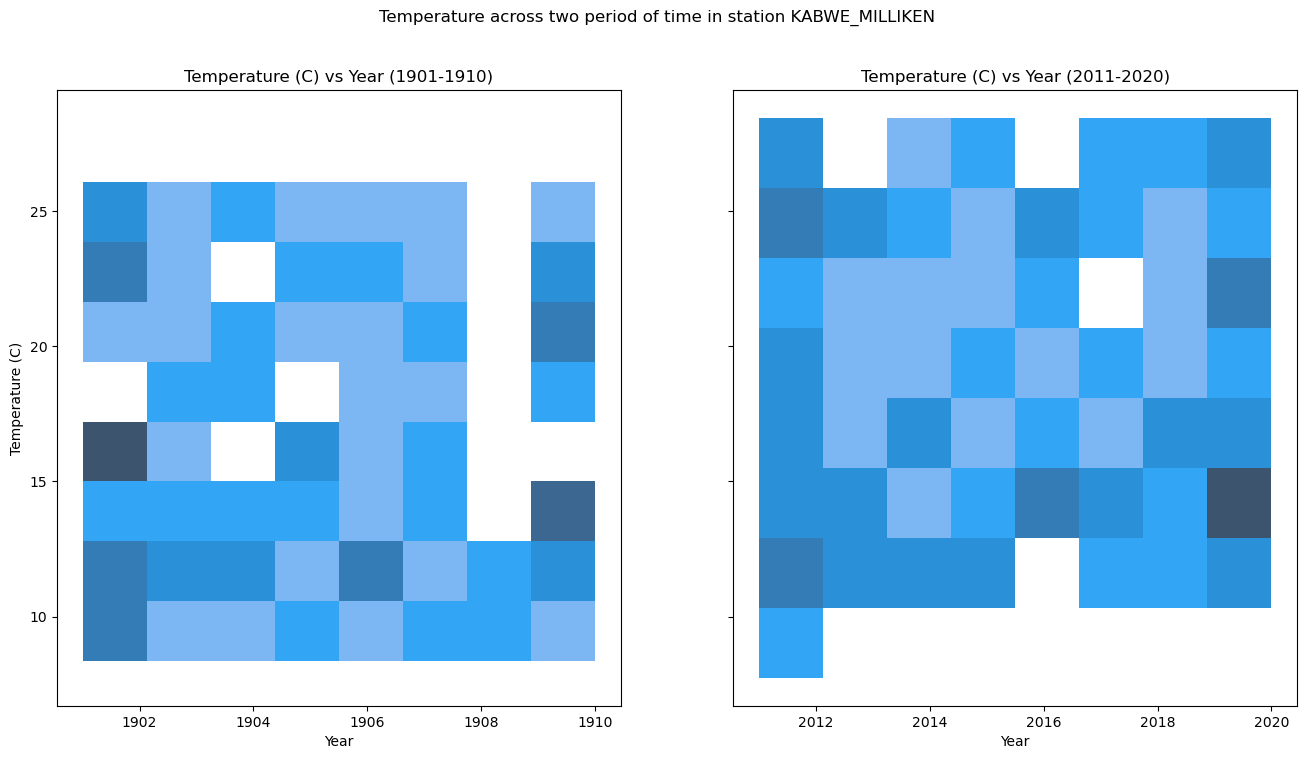

In [12]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(16,8))
fig.suptitle('Temperature across two period of time in station KABWE_MILLIKEN')

# Choose station KABWE_MILLIKEN from df and split them into two parts corresponding to two time periods
df_19_KABWE_MILLIKEN = df_19[
        (df['Station_name'] == 'KABWE_MILLIKEN')]

df_20_KABWE_MILLIKEN = df_20[
        (df['Station_name'] == 'KABWE_MILLIKEN')]

sns.histplot(df_19_ALGER_DAR_EL_BEIDA, x="Year", y="Temperature (C)", ax=ax[0])
ax[0].set_title('Temperature (C) vs Year (1901-1910)')

sns.histplot(df_20_ALGER_DAR_EL_BEIDA, x="Year", y="Temperature (C)", ax=ax[1])
ax[1].set_title('Temperature (C) vs Year (2011-2020)')

Comapre the temperature at the same station (BEGUMPETOBSY) at two time priod using histgram (cross 110 years)
The temprature at the same station at the place is clearly higher overall between 2011-2020 compared with 1901 to 1910 (The line representing the average temperatures between 2011-2020 is clearly all above the line for 1901-1910 except for one year), we can see a warming trend

Text(0.5, 1.0, 'Temperature (C) vs Year (2011-2020)')

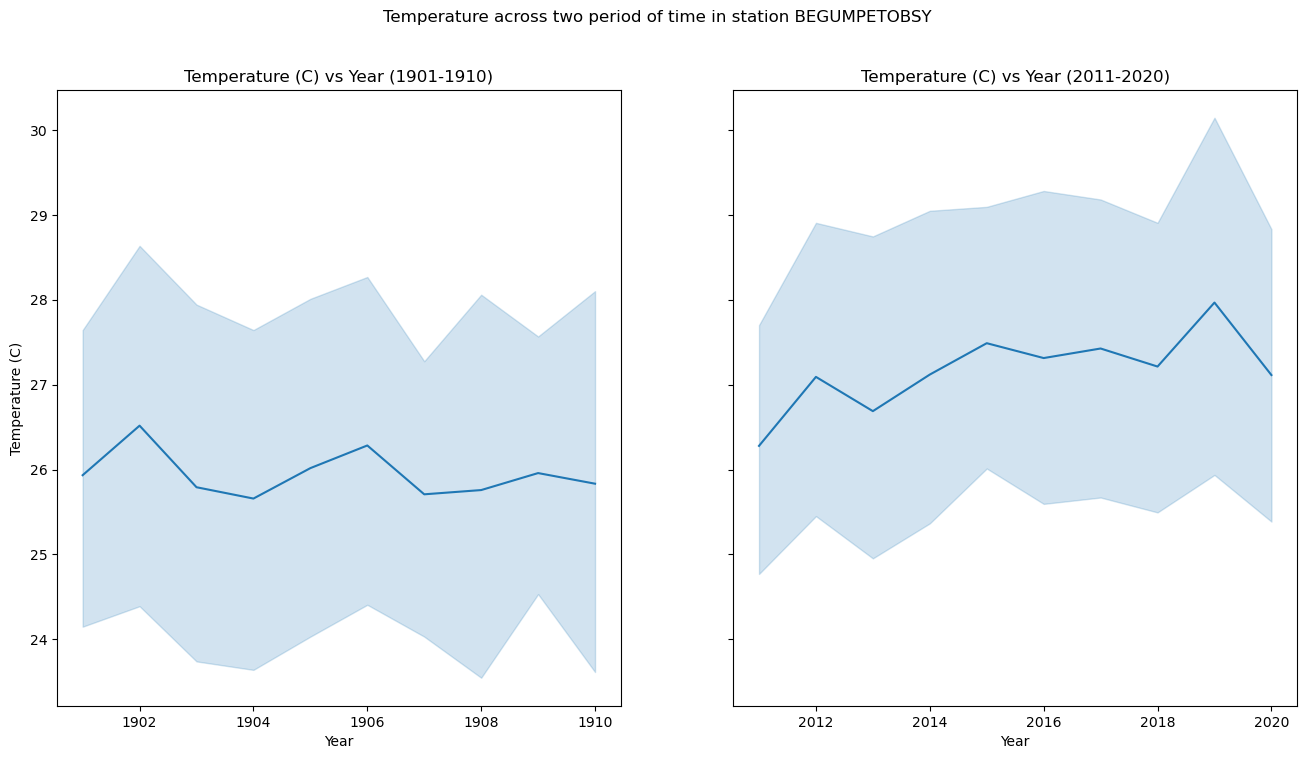

In [13]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(16,8))
fig.suptitle('Temperature across two period of time in station BEGUMPETOBSY')

# Choose station BEGUMPETOBSY from df and split them into two parts corresponding to two time periods
df_19_BEGUMPETOBSY = df_19[
        (df['Station_name'] == 'BEGUMPETOBSY')]

df_20_BEGUMPETOBSY = df_20[
        (df['Station_name'] == 'BEGUMPETOBSY')]

sns.lineplot(df_19_BEGUMPETOBSY, x="Year", y="Temperature (C)", ax=ax[0])
ax[0].set_title('Temperature (C) vs Year (1901-1910)')

sns.lineplot(df_20_BEGUMPETOBSY, x="Year", y="Temperature (C)", ax=ax[1])
ax[1].set_title('Temperature (C) vs Year (2011-2020)')

## Based on these three comparison plot, we can conclude that there is a global warming trend as the temperatures at different stations across the world all increases in the past century

## Publish (5 pts)

Publish your work on quarto and github:

1. Publish your work using `quarto publish`. Please include your blog link. 

2. Create a repository called HW in your github account, then upload your jupyter notebook. You should create a readme.md file to describe this repository. Please include the link. 